In [1]:
# Convolutional Neural Network for multi-class softmax classification

In [2]:
# Import the dependencies

%matplotlib inline
import matplotlib.pyplot as plt #For plots
import pandas as pd #For Dataframes
import numpy as np #For scientific computing 

In [3]:
# Import Keras dependencies

import keras

from keras.models import Sequential, load_model
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras import backend as K

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
batch_size = 256
num_classes = 10
epochs = 10
img_rows, img_cols = 28, 28    # Input image dimensions

In [5]:
Emnist_file_path = "emnist/"

In [6]:
All_train = Emnist_file_path + 'emnist-digits-train.csv'
All_test = Emnist_file_path + 'emnist-digits-test.csv'

In [7]:
All_train_data = pd.read_csv(All_train)
All_test_data = pd.read_csv(All_test)

In [8]:
All_training_data = All_train_data.values
All_testing_data = All_test_data.values

In [9]:
print(type(All_training_data))
print(type(All_testing_data))
print(All_training_data.shape)
print(All_testing_data.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(239999, 785)
(39999, 785)


In [10]:
x_train = All_training_data[:, 1:].astype('float32')
y_train = All_training_data[:, 0:1]
print('x_train shape : ', x_train.shape)
print('y_train shape : ', y_train.shape)

x_train shape :  (239999, 784)
y_train shape :  (239999, 1)


In [11]:
x_test = All_testing_data[:, 1:].astype('float32')
y_test = All_testing_data[:, 0:1]
print('x_test shape : ', x_test.shape)
print('y_test shape : ', y_test.shape)

x_test shape :  (39999, 784)
y_test shape :  (39999, 1)


In [12]:
# for conv2d
x_train = np.array(list(map(lambda x : x.reshape(28, 28).transpose().reshape(28, 28, 1), x_train)))
x_test = np.array(list(map(lambda x : x.reshape(28, 28).transpose().reshape(28, 28, 1), x_test)))

In [13]:
input_shape = (img_rows, img_cols, 1)

In [14]:
print(type(x_train))
print('x_train shape : ', x_train.shape)

<class 'numpy.ndarray'>
x_train shape :  (239999, 28, 28, 1)


In [15]:
print(type(x_test))
print('x_test shape : ', x_test.shape)

<class 'numpy.ndarray'>
x_test shape :  (39999, 28, 28, 1)


In [ ]:
# Print the i data 
i = 90089
plt.imshow(x_test[i].reshape(28, 28),cmap='gray')
plt.colorbar()
print('data ', i, ' : ', y_test[i])

In [16]:
# Make it 0 based indices

y_train = y_train - 1
y_test = y_test - 1

In [17]:
# Scale from 0 to 255

x_train /= 255
x_test /= 255

In [18]:
# Convert labels to categorical one-hot encoding

y_train = keras.utils.to_categorical(y_train, num_classes)

y_test = keras.utils.to_categorical(y_test, num_classes)

In [19]:
# Set the CNN Architecture

model = Sequential()
# filters: Integer (Here 32), the dimensionality of the output space (i.e. the number of output filters in the convolution).
# kernel_size: An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. 
# Can be a single integer to specify the same value for all spatial dimensions.
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

In [20]:
# # for conv2D
# model = Sequential()
# model.add(Conv2D(64, (5, 5),input_shape=(28, 28, 1), activation='relu'))
# model.add(MaxPooling2D((2, 2), (2, 2)))
# model.add(Flatten())
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'),)
# model.add(Dense(num_classes, activation='softmax'))

In [21]:
# Compile the Model

# model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

In [22]:
# We can summarize our model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4719104   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
__________

In [23]:
# Calculate the Classification Accuracy on the Test Set (Before Training)

score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]
print('Before Training - Test accuracy: %.4f%%' % accuracy)

Before Training - Test accuracy: 10.3428%


In [25]:
checkpointer = ModelCheckpoint(filepath='emnist.digits.cnn.model.best.hdf5', verbose=1, save_best_only=True)

In [26]:
# Train the model, iterating on the data in batches of 256 samples with epochs 10

Trained_Model = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

Train on 191999 samples, validate on 48000 samples
Epoch 1/10
191999/191999 [==============================] - 1062s 6ms/step - loss: 0.0917 - acc: 0.9729 - val_loss: 0.0291 - val_acc: 0.9912

Epoch 00001: val_loss improved from inf to 0.02906, saving model to emnist.digits.cnn.model.best.hdf5
Epoch 2/10
191999/191999 [==============================] - 1608s 8ms/step - loss: 0.0308 - acc: 0.9909 - val_loss: 0.0239 - val_acc: 0.9929

Epoch 00002: val_loss improved from 0.02906 to 0.02391, saving model to emnist.digits.cnn.model.best.hdf5
Epoch 3/10
191999/191999 [==============================] - 1119s 6ms/step - loss: 0.0226 - acc: 0.9933 - val_loss: 0.0213 - val_acc: 0.9938

Epoch 00003: val_loss improved from 0.02391 to 0.02129, saving model to emnist.digits.cnn.model.best.hdf5
Epoch 4/10
191999/191999 [==============================] - 523s 3ms/step - loss: 0.0181 - acc: 0.9945 - val_loss: 0.0255 - val_acc: 0.9932

Epoch 00004: val_loss did not improve from 0.02129
Epoch 5/10
191999

In [27]:
# Load the Model with the Best Classification Accuracy on the Validation Set

model.load_weights('emnist.digits.cnn.model.best.hdf5')

In [28]:
# Save the best model

model.save('eminst_digits_cnn_model.h5')

In [29]:
# Evaluate test accuracy

score = model.evaluate(x_test, y_test, verbose=0)

accuracy = 100*score[1]
loss = 100*score[0]

print('Test accuracy: %.4f%%' % accuracy)
print('Test loss: %.4f%%' % loss)

Test accuracy: 99.4550%
Test loss: 1.9149%


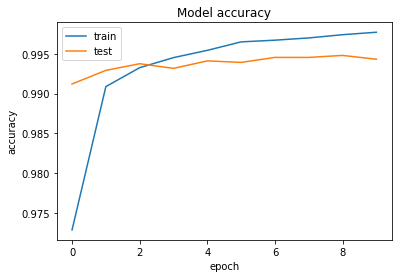

In [30]:
# Summarize history for accuracy

plt.plot(Trained_Model.history['acc'])
plt.plot(Trained_Model.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

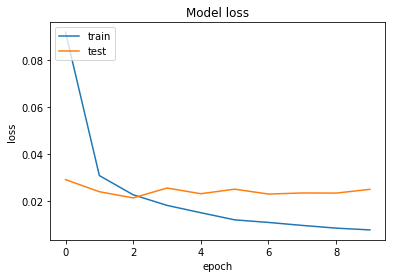

In [31]:
# Summarize history for loss

plt.plot(Trained_Model.history['loss'])
plt.plot(Trained_Model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Making Predictions
We can use our trained model to make predictions using model.predict

In [32]:
test = np.expand_dims(x_train[3], axis=0)
test.shape

(1, 28, 28, 1)

data  39877  :  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


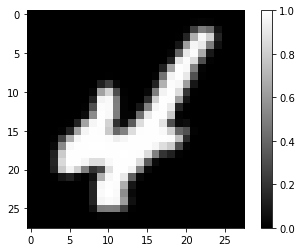

In [33]:
# Print the i data 
i = 39877
plt.imshow(x_test[i].reshape(28, 28),cmap='gray')
plt.colorbar()
print('data ', i, ' : ', y_test[3])

In [34]:
# Make a prediction. The resulting class should match the digit
print(f"One-Hot-Encoded Prediction: {model.predict(test).round()}")
print(f"Predicted class: {model.predict_classes(test)}")

One-Hot-Encoded Prediction: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Predicted class: [5]


In [86]:
filepath = "uploads/num1.png"

In [87]:
from keras.preprocessing import image
image_size = (28, 28)
im = image.load_img(filepath, target_size=image_size, grayscale=True)
im

C:\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [88]:
# Convert the image to a numpy array 
from keras.preprocessing.image import img_to_array
image = img_to_array(im)
image.shape

(28, 28, 1)

In [89]:
image = np.expand_dims(image, axis=0)
image.shape

(1, 28, 28, 1)

In [80]:
# Scale the image pixels by 255 (or use a scaler from sklearn here)
image /= 255

In [81]:
# Flatten into a 1x28*28 array 
img = image.flatten().reshape(-1, 28*28)
img.shape

(1, 784)

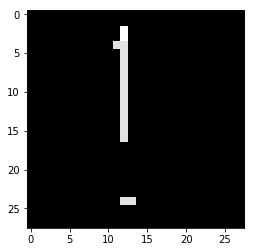

In [82]:
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

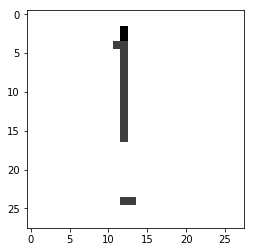

In [83]:
# # Invert the pixel values to match the original data
img = 1 - img
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

In [84]:
# Make predictions
pred = model.predict_classes(image)

In [85]:
pred[0]+1

8